In [1]:
import pandas as pd
import numpy as np
import talib as ta
from pandas import Series
from datetime import datetime
import matplotlib.pyplot as plt

### 题目一、将所有股票的keys打印出来

In [3]:
data1 = pd.read_excel('sz50.xlsx',None,index_col='datetime')
#print(data.keys())
Lname=list(data1.keys())
print(Lname)

['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG']


### 题目二、计算10日均线值，返回ndarray的最后五个值

In [4]:
stock1 = pd.read_excel('sz50.xlsx',sheet_name='600036.XSHG', index_col='datetime')

#读取'numpy.ndarray'
stockS1 = stock1.close.values
print(type(stockS1))
#10日均线
print(ta.MA(stockS1, 10)[-5:])

<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


### 题目三、将价格和MA值用Matplotlib展示出来

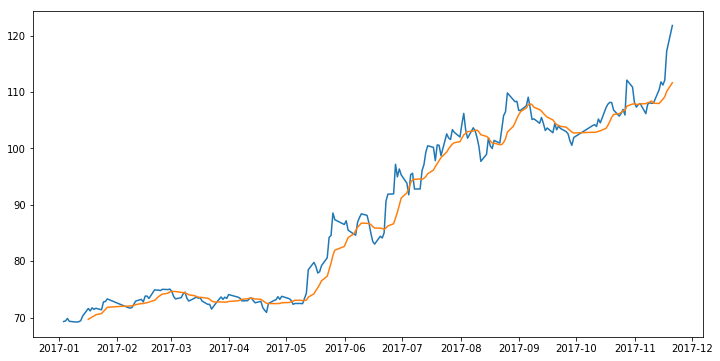

In [5]:
plt.figure(figsize=(12, 6))
MA10 = ta.MA(stockS1,10)
S_MA10 = Series(MA10,stock1.index)
S_MA10.name = "MA10"
df_ma = pd.DataFrame([stock1.close,S_MA10])
plt.plot(df_ma.T)

### 题目四、前5只股票的ROCR100（参数timeperiod=5）用一张图显示出来

In [6]:
print(len(Lname))
data_dict = {}
for s in Lname:
    # 经过数据排查发现600485.XSHG股票数据缺失，因此忽略该股票
    if s == '600485.XSHG':
        continue
    #print(s)
    data2 = pd.read_excel('sz50.xlsx',sheet_name=s, index_col='datetime')
    close = data2['close']
    real = ta.ROCR100(close, timeperiod=5)
    data_dict[s] = real
    
data3 = pd.DataFrame(data_dict)
#填充缺失值,选择向下填充不影响ROCR100结果
df_na = data3.fillna(method='ffill')

50


In [7]:
df_na.tail()

,600000.XSHG,600016.XSHG,600028.XSHG,600029.XSHG,600030.XSHG,600036.XSHG,600048.XSHG,600050.XSHG,600100.XSHG,600104.XSHG,...,601766.XSHG,601788.XSHG,601800.XSHG,601818.XSHG,601857.XSHG,601881.XSHG,601901.XSHG,601985.XSHG,601988.XSHG,601989.XSHG
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-14 15:00:00,100.476353,100.953984,96.557246,107.454668,103.527126,103.662155,100.195626,98.546210,105.070588,104.304483,...,93.148576,99.596542,97.532249,99.418605,97.255261,98.723724,101.172333,97.622028,99.184339,93.497364
2017-11-15 15:00:00,100.152620,99.529243,95.708502,107.004670,99.826489,102.913969,102.193574,101.894737,104.478938,103.633669,...,94.964595,97.457627,97.142857,99.224806,95.929695,96.020634,98.377752,98.482933,98.061389,94.175627
2017-11-16 15:00:00,98.725140,98.919049,95.068715,110.740993,97.478871,103.804851,107.527464,97.070707,102.127660,102.478201,...,91.881343,96.434635,95.321308,99.804688,94.833948,94.100295,96.503497,95.443038,98.045603,94.165171
2017-11-17 15:00:00,101.182333,101.546063,98.512397,112.607830,99.501637,108.535456,112.359551,96.589769,98.562433,102.371424,...,97.425583,98.744292,96.873223,102.156863,96.813496,90.109890,94.192799,97.570332,101.153213,92.857143
2017-11-20 15:00:00,100.391667,101.657678,98.026316,111.074919,97.214645,110.334209,113.761608,98.393574,97.330139,101.844909,...,97.431782,98.171429,96.772334,101.353965,97.378277,91.124260,95.028902,96.666667,101.311475,95.884004


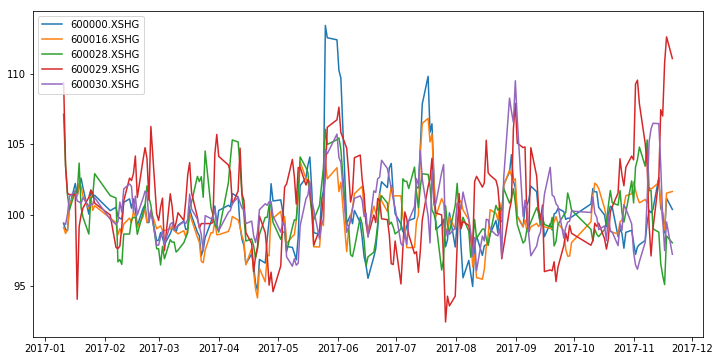

In [8]:
data4 = df_na[['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG']]
plt.figure(figsize=(12, 6))
plt.plot(data4)
plt.legend(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG'])

### 题目五、用Panel来计算50只股票的MACD并且输出MACD的Panel的MultiIndex格式

In [9]:
#本题解实际并没有利用panel结构计算MACD，只是把最后的结果转化成了panel的Multiindex格式。
data_dict2 = {}
data_dict3 = {}
data_dict4 = {}
for s in Lname:
    # 经过数据排查发现600485.XSHG股票数据缺失，因此忽略该股票
    if s == '600485.XSHG':
        continue
    data5 = pd.read_excel('sz50.xlsx',sheet_name=s, index_col='datetime')
    close = data5['close']
    macd, signal, hist = ta.MACD(close)
    data_dict2[s] = macd
    data_dict3[s] = signal
    data_dict4[s] = hist
    
       
data6 = pd.DataFrame(data_dict2)
data7 = pd.DataFrame(data_dict3)     
data8 = pd.DataFrame(data_dict4)   

In [10]:
d = {'macd':data6,'siganl':data7,'hist':data8}
df = pd.Panel(d)
print (df.to_frame().tail())

                                     macd    siganl      hist
datetime            minor                                    
2017-11-20 15:00:00 601881.XSHG -0.471919 -0.403344 -0.068574
                    601901.XSHG -0.106860 -0.094530 -0.012330
                    601985.XSHG -0.017573  0.024240 -0.041813
                    601988.XSHG -0.082474 -0.091479  0.009005
                    601989.XSHG -0.249136 -0.252932  0.003796


H:\WIN7\Anaconda2\envs\python36\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
